# Test python for unbalanced dgp

In [1]:
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt

from utils import BalanceTable

## Data



In [2]:
# load data from csv
dgp_name = "unbalanced"

df_train = pd.read_csv(f"../dgps/data/{dgp_name}_train.csv")
df_test = pd.read_csv(f"../dgps/data/{dgp_name}_test.csv")

print(f"percentage of treated in train set: {df_train['D'].mean()}")
print(f"percentage of treated in test set: {df_test['D'].mean()}")

df_train.head()

percentage of treated in train set: 0.0534
percentage of treated in test set: 0.06


,X1,X2,X3,D,Y,m_oracle,m_hat,m_calibrated,m_oracle_ate_weights,m_oracle_att_weights,m_hat_ate_weights,m_hat_att_weights,m_calibrated_ate_weights,m_calibrated_att_weights
0,1.372271,0.595549,0,0,3.728639,0.135755,0.139917,0.142857,1.157079,0.157079,1.162679,0.162679,1.166667,0.166667
1,0.462103,0.755682,0,0,1.338655,0.021218,0.023815,0.023364,1.021678,0.021678,1.024396,0.024396,1.023923,0.023923
2,-0.960046,0.240038,1,0,2.427715,0.003470,0.003420,0.001828,1.003482,0.003482,1.003432,0.003432,1.001832,0.001832
3,-0.607569,0.934605,1,0,2.387937,0.003506,0.004413,0.001828,1.003518,0.003518,1.004433,0.004433,1.001832,0.001832
4,-0.565393,0.395288,0,0,1.465630,0.003966,0.004019,0.001828,1.003982,0.003982,1.004035,0.004035,1.001832,0.001832


## ATE

### Balance Tables

In [3]:
covs = ["X1", "X2", "X3", "Y"]

bal_table_train = BalanceTable(
    df=df_train,
    cov_cols=covs,
    treatment="D",
    weights=df_train["m_oracle_ate_weights"],
)

bal_table_test = BalanceTable(
    df=df_test,
    cov_cols=covs,
    treatment="D",
    weights=df_test["m_oracle_ate_weights"],
)

print(bal_table_train)
print(bal_table_test)

Effective Sample Size:
            Control  Treated
Unadjusted  4733.00   267.00
Adjusted    3647.56    41.19

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    1.561509  0.344446
1        X2  Contin.   -0.140707 -0.144893
2        X3   Binary    0.089781 -0.004252
3         Y  Contin.    1.898806  1.096543
Effective Sample Size:
            Control  Treated
Unadjusted  4700.00   300.00
Adjusted    4583.74    23.85

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    1.587954 -0.054622
1        X2  Contin.   -0.233329 -0.108923
2        X3   Binary    0.099149  0.006047
3         Y  Contin.    2.083282  0.958734


### Love Plots

In [4]:
ate_plots_train = []
ate_plots_test = []

weights_list = ["m_oracle_ate_weights", "m_hat_ate_weights", "m_calibrated_ate_weights"]

for i, weights in enumerate(weights_list):
    bal_table_train = BalanceTable(
        df=df_train,
        cov_cols=covs,
        treatment="D",
        weights=df_train[weights],
    )

    bal_table_test = BalanceTable(
        df=df_test,
        cov_cols=covs,
        treatment="D",
        weights=df_test[weights],
    )

    print(bal_table_train)
    print(bal_table_test)

    p_train = bal_table_train.love_plot() + \
              p9.ggtitle(f"Train - {weights}")
    
    p_test = bal_table_test.love_plot() + \
             p9.ggtitle(f"Test - {weights}")

    ate_plots_train.append(p_train)
    ate_plots_test.append(p_test)

Effective Sample Size:
            Control  Treated
Unadjusted  4733.00   267.00
Adjusted    3647.56    41.19

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    1.561509  0.344446
1        X2  Contin.   -0.140707 -0.144893
2        X3   Binary    0.089781 -0.004252
3         Y  Contin.    1.898806  1.096543
Effective Sample Size:
            Control  Treated
Unadjusted  4700.00   300.00
Adjusted    4583.74    23.85

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    1.587954 -0.054622
1        X2  Contin.   -0.233329 -0.108923
2        X3   Binary    0.099149  0.006047
3         Y  Contin.    2.083282  0.958734
Effective Sample Size:
            Control  Treated
Unadjusted  4733.00    267.0
Adjusted    3890.72     40.6

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    1.568226  0.344710
1        X2  Contin.   -0.140204 -0.243985
2        X3   Binary    0.089781 -0.011487
3         Y  Contin.    1.892450

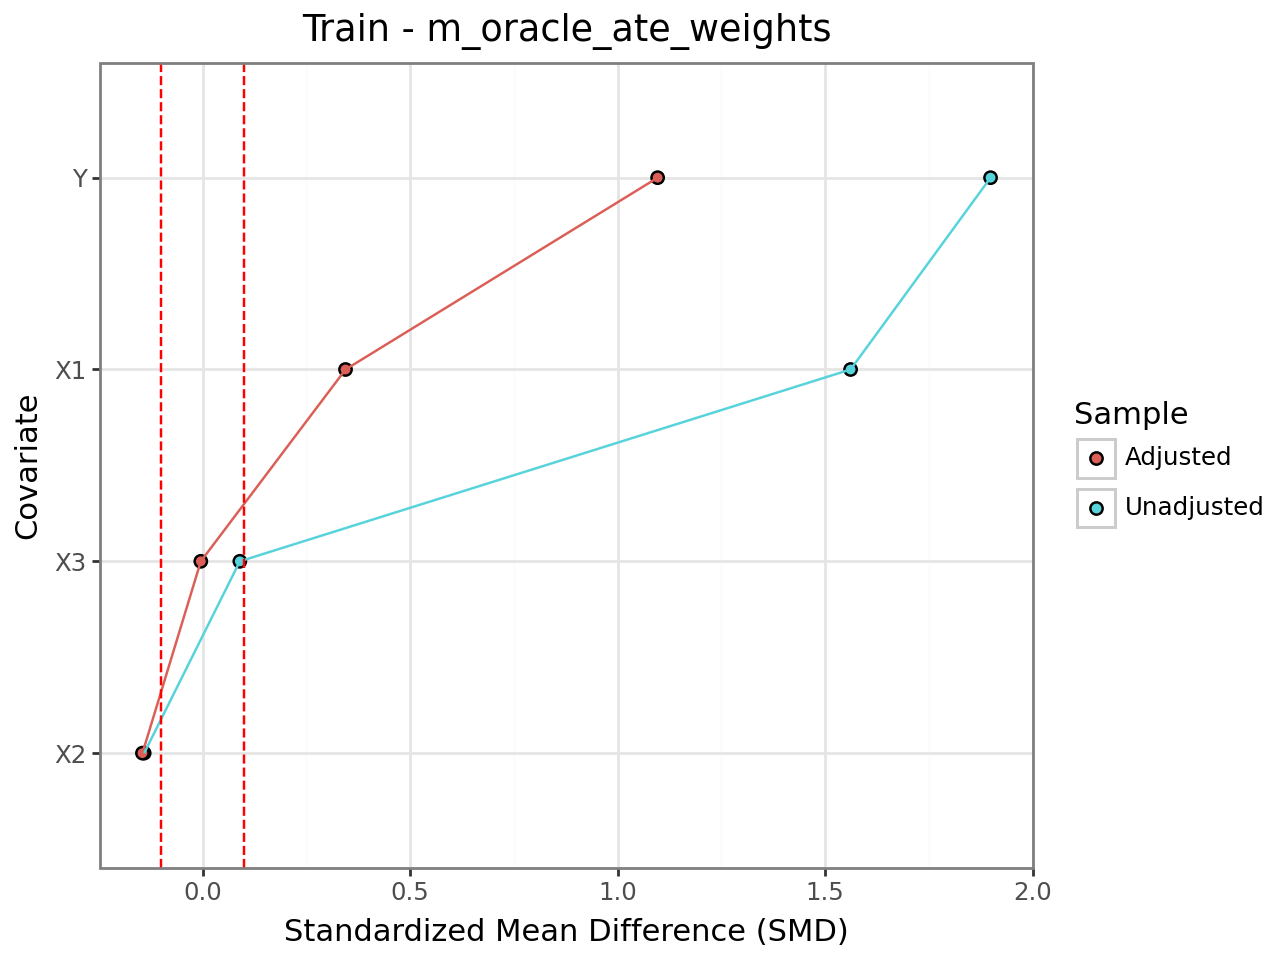

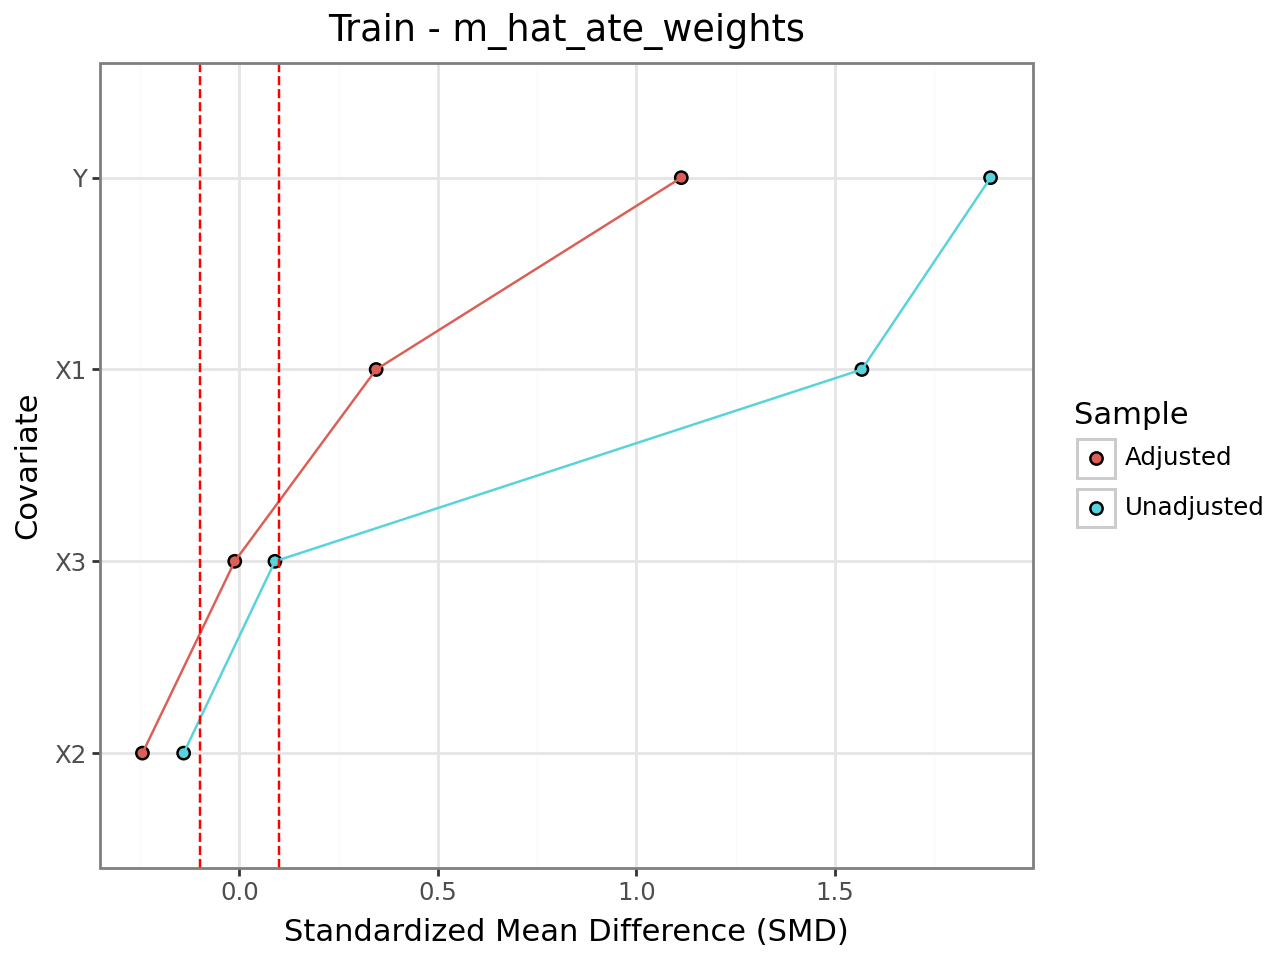

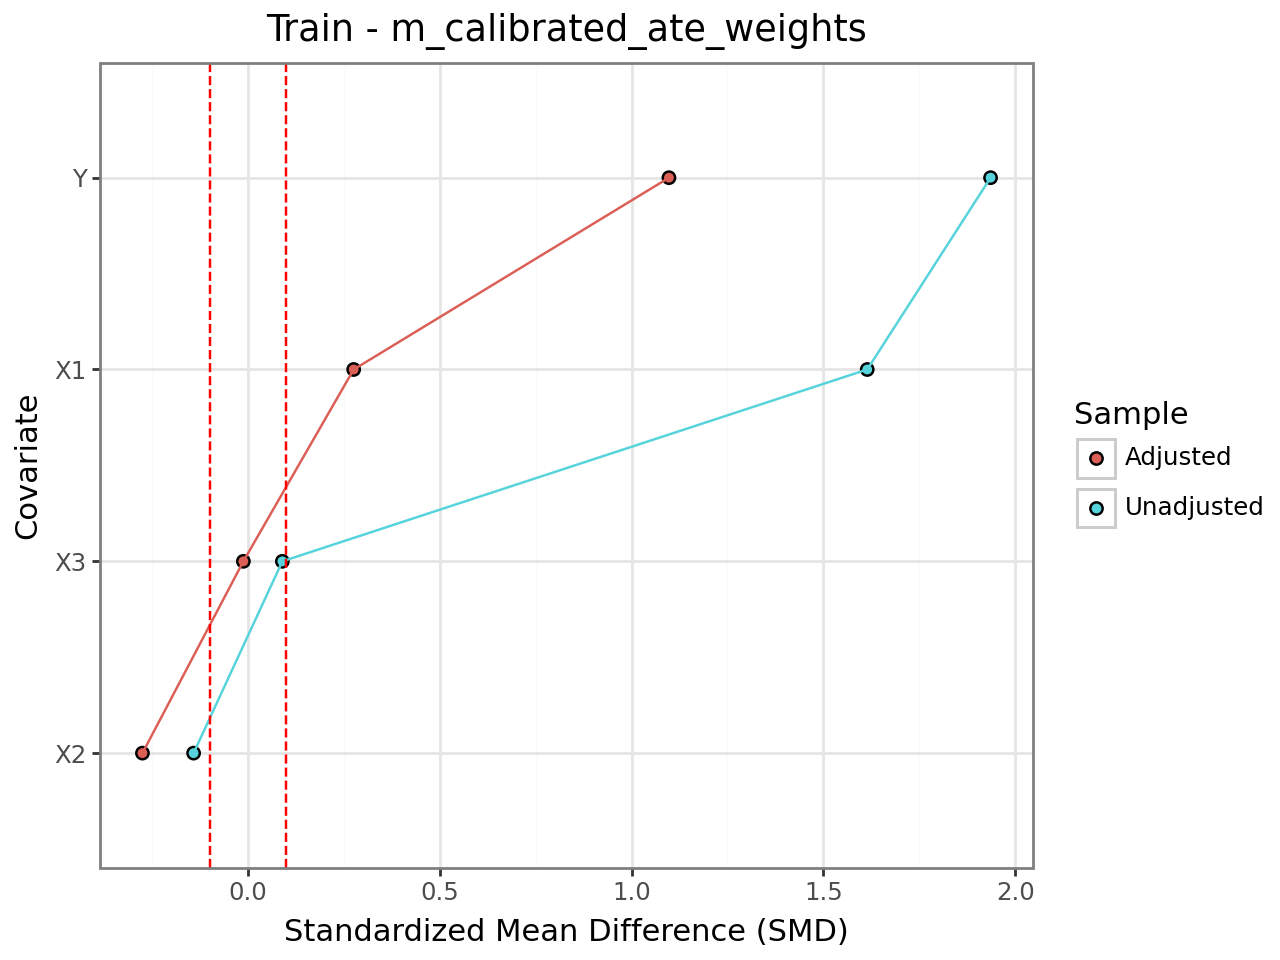

In [5]:
for i, p in enumerate(ate_plots_train):
    p.show()

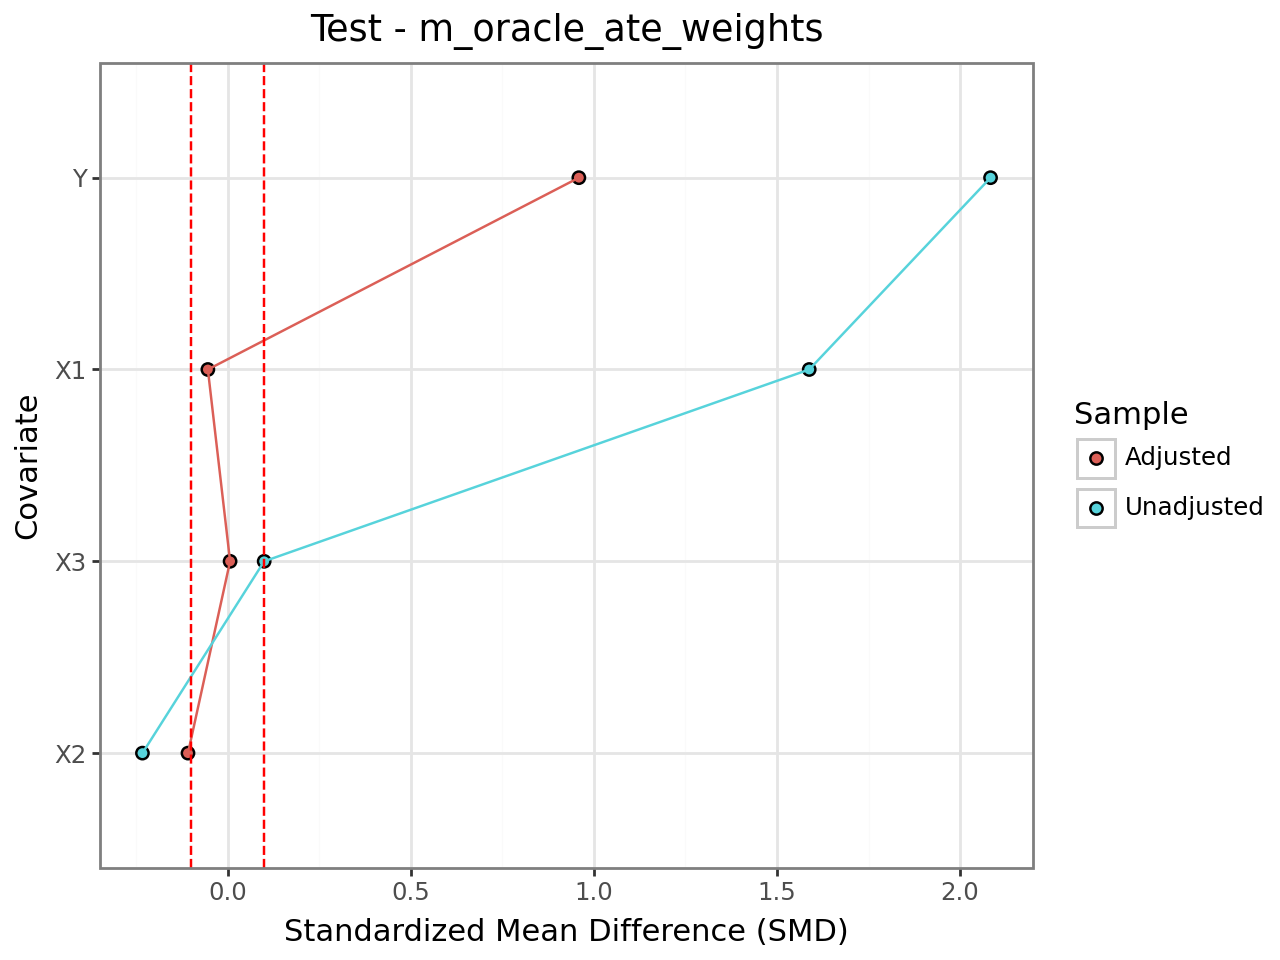

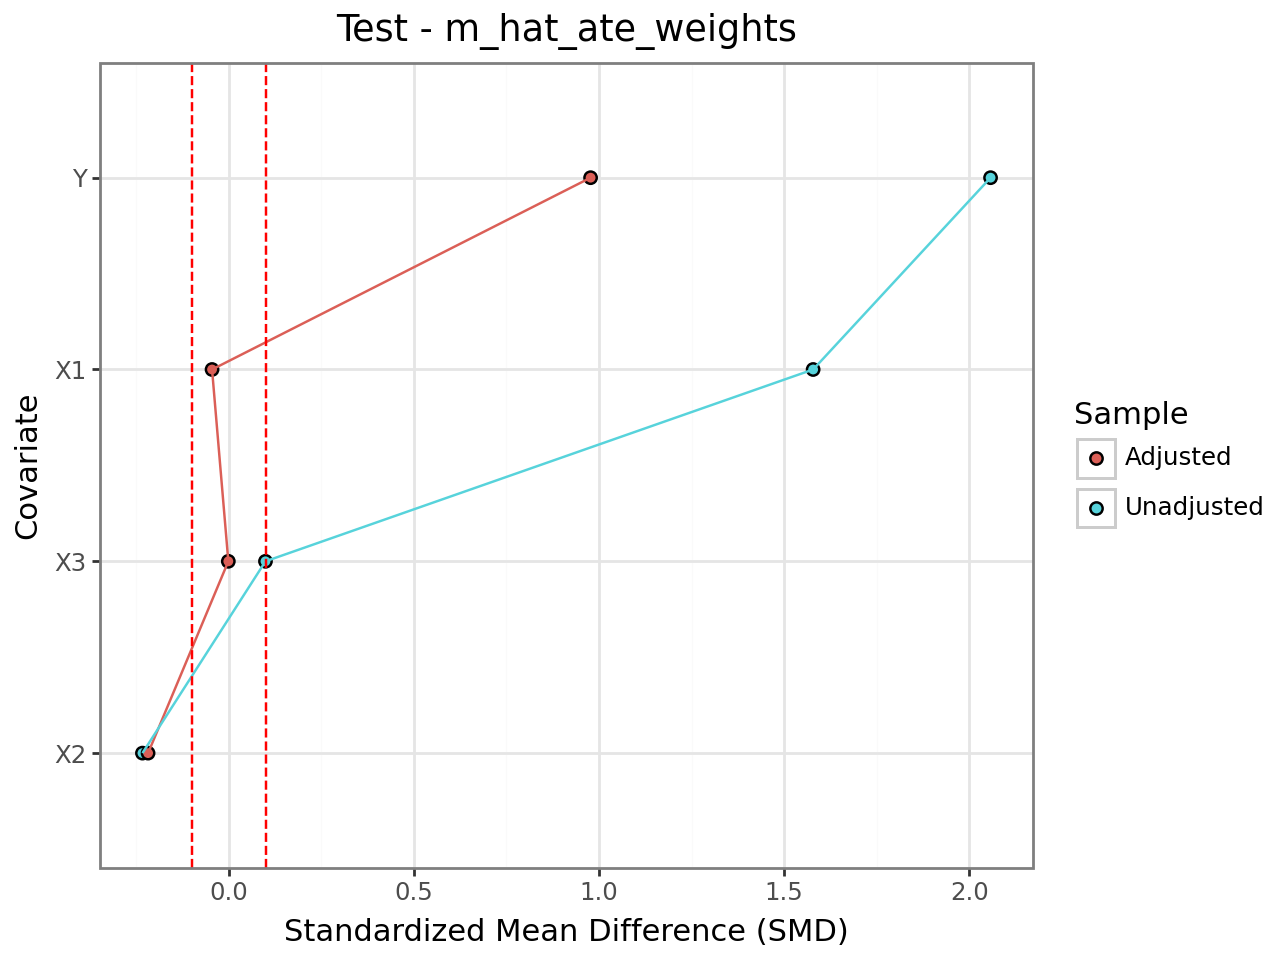

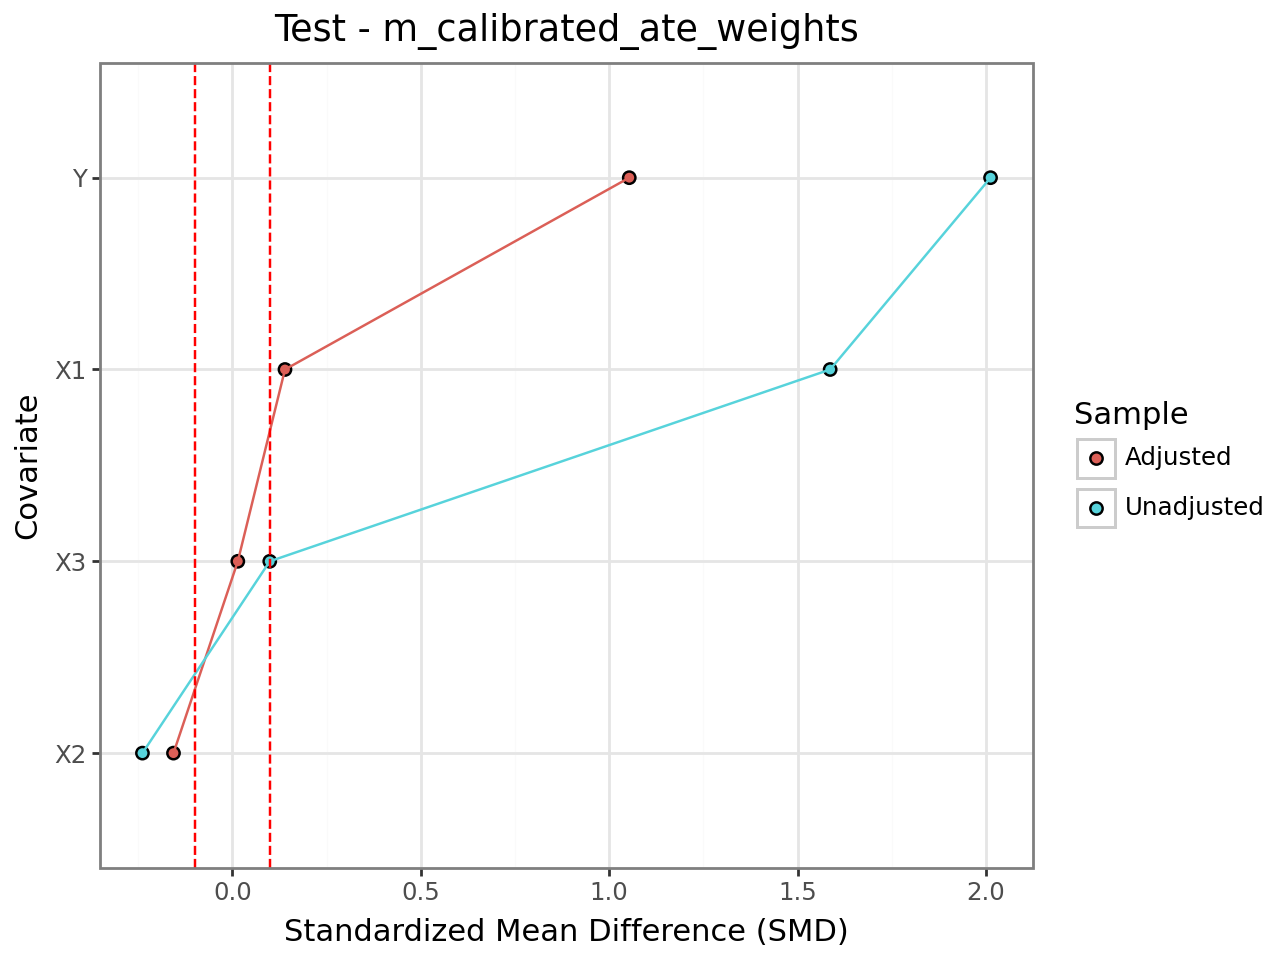

In [6]:
for i, p in enumerate(ate_plots_test):
    p.show()

## ATT

### Balance Tables

In [7]:
covs = ["X1", "X2", "X3", "Y"]

bal_table_train = BalanceTable(
    df=df_train,
    cov_cols=covs,
    treatment="D",
    weights=df_train["m_oracle_att_weights"],
)

bal_table_test = BalanceTable(
    df=df_test,
    cov_cols=covs,
    treatment="D",
    weights=df_test["m_oracle_att_weights"],
)

print(bal_table_train)
print(bal_table_test)

Effective Sample Size:
            Control  Treated
Unadjusted  4733.00    267.0
Adjusted      56.53    267.0

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    0.815670 -0.148020
1        X2  Contin.   -0.139264  0.194008
2        X3   Binary    0.089781  0.066864
3         Y  Contin.    1.134098  0.366843
Effective Sample Size:
            Control  Treated
Unadjusted  4700.00    300.0
Adjusted     455.49    300.0

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    0.940334  0.025438
1        X2  Contin.   -0.246412 -0.032967
2        X3   Binary    0.099149  0.011670
3         Y  Contin.    1.211137  0.555492


### Love Plots

In [8]:
att_plots_train = []
att_plots_test = []

weights_list = ["m_oracle_att_weights", "m_hat_att_weights", "m_calibrated_att_weights"]

for i, weights in enumerate(weights_list):
    bal_table_train = BalanceTable(
        df=df_train,
        cov_cols=covs,
        treatment="D",
        weights=df_train[weights],
    )

    bal_table_test = BalanceTable(
        df=df_test,
        cov_cols=covs,
        treatment="D",
        weights=df_test[weights],
    )

    print(bal_table_train)
    print(bal_table_test)

    p_train = bal_table_train.love_plot() + \
              p9.ggtitle(f"Train - {weights}")
    
    p_test = bal_table_test.love_plot() + \
             p9.ggtitle(f"Test - {weights}")

    att_plots_train.append(p_train)
    att_plots_test.append(p_test)

Effective Sample Size:
            Control  Treated
Unadjusted  4733.00    267.0
Adjusted      56.53    267.0

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    0.815670 -0.148020
1        X2  Contin.   -0.139264  0.194008
2        X3   Binary    0.089781  0.066864
3         Y  Contin.    1.134098  0.366843
Effective Sample Size:
            Control  Treated
Unadjusted  4700.00    300.0
Adjusted     455.49    300.0

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    0.940334  0.025438
1        X2  Contin.   -0.246412 -0.032967
2        X3   Binary    0.099149  0.011670
3         Y  Contin.    1.211137  0.555492
Effective Sample Size:
            Control  Treated
Unadjusted  4733.00    267.0
Adjusted      73.31    267.0

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    0.832903 -0.121707
1        X2  Contin.   -0.140006  0.087543
2        X3   Binary    0.089781  0.055328
3         Y  Contin.    1.149161

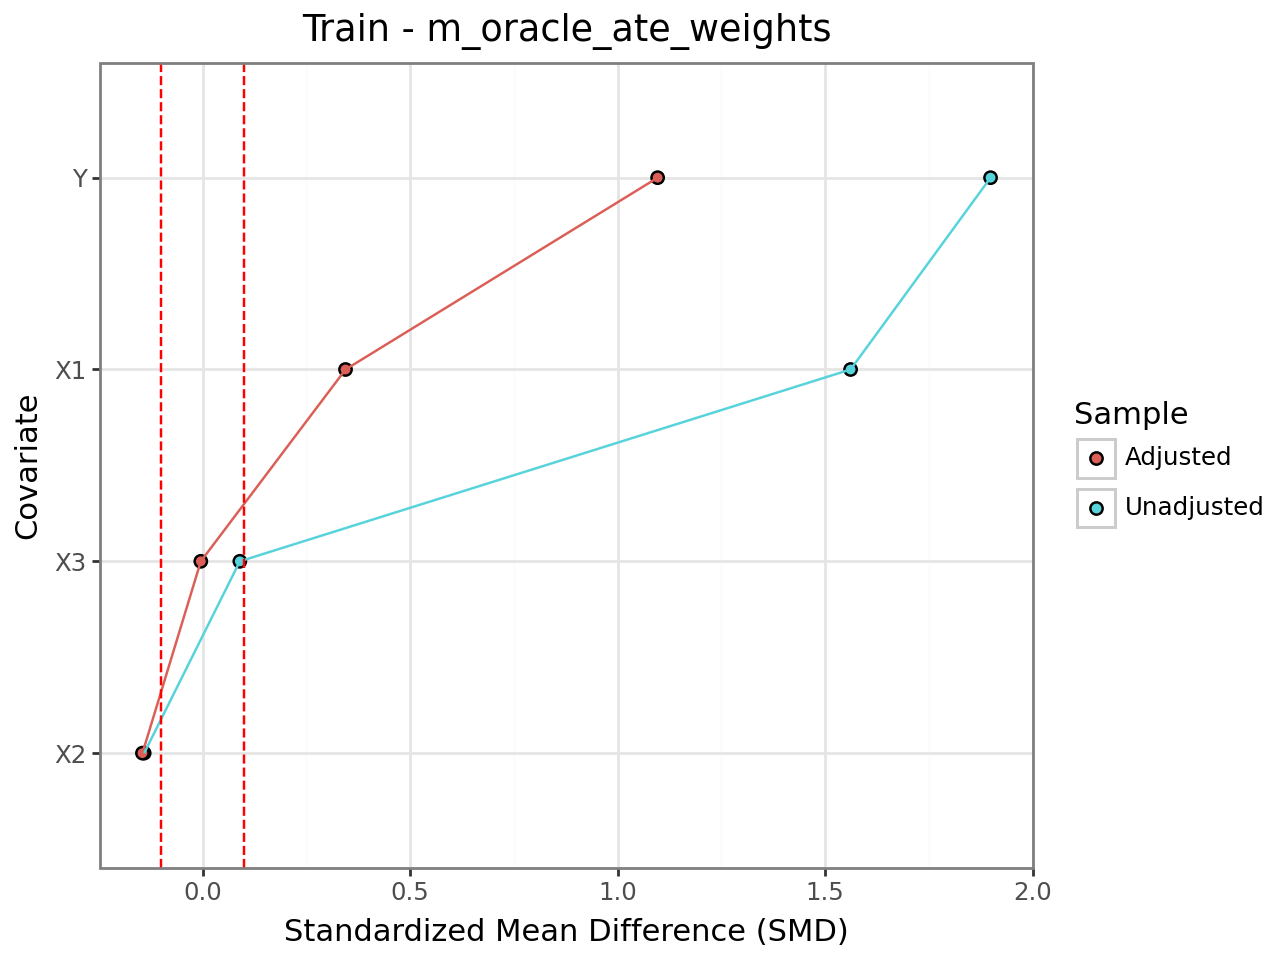

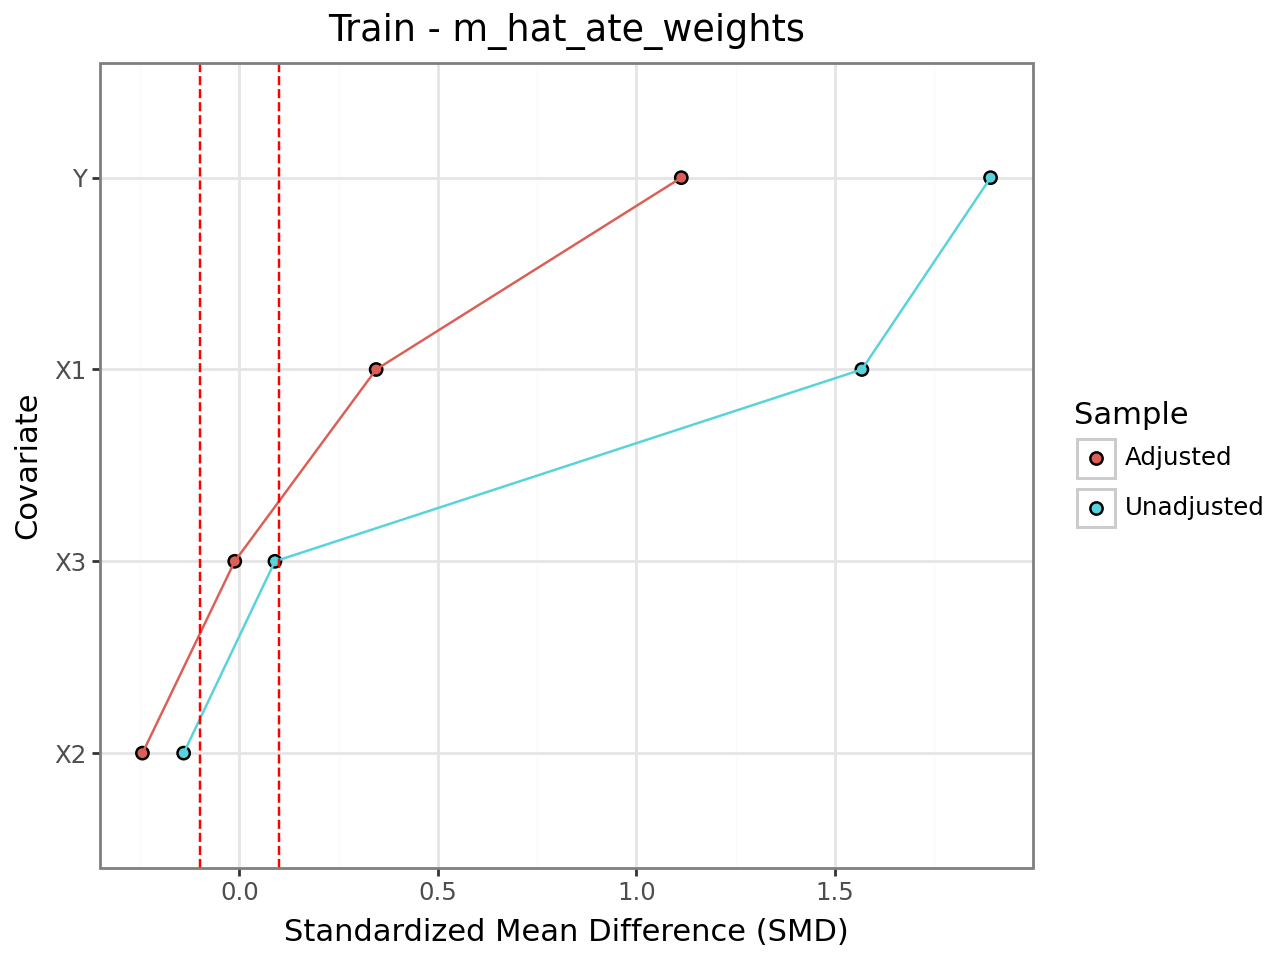

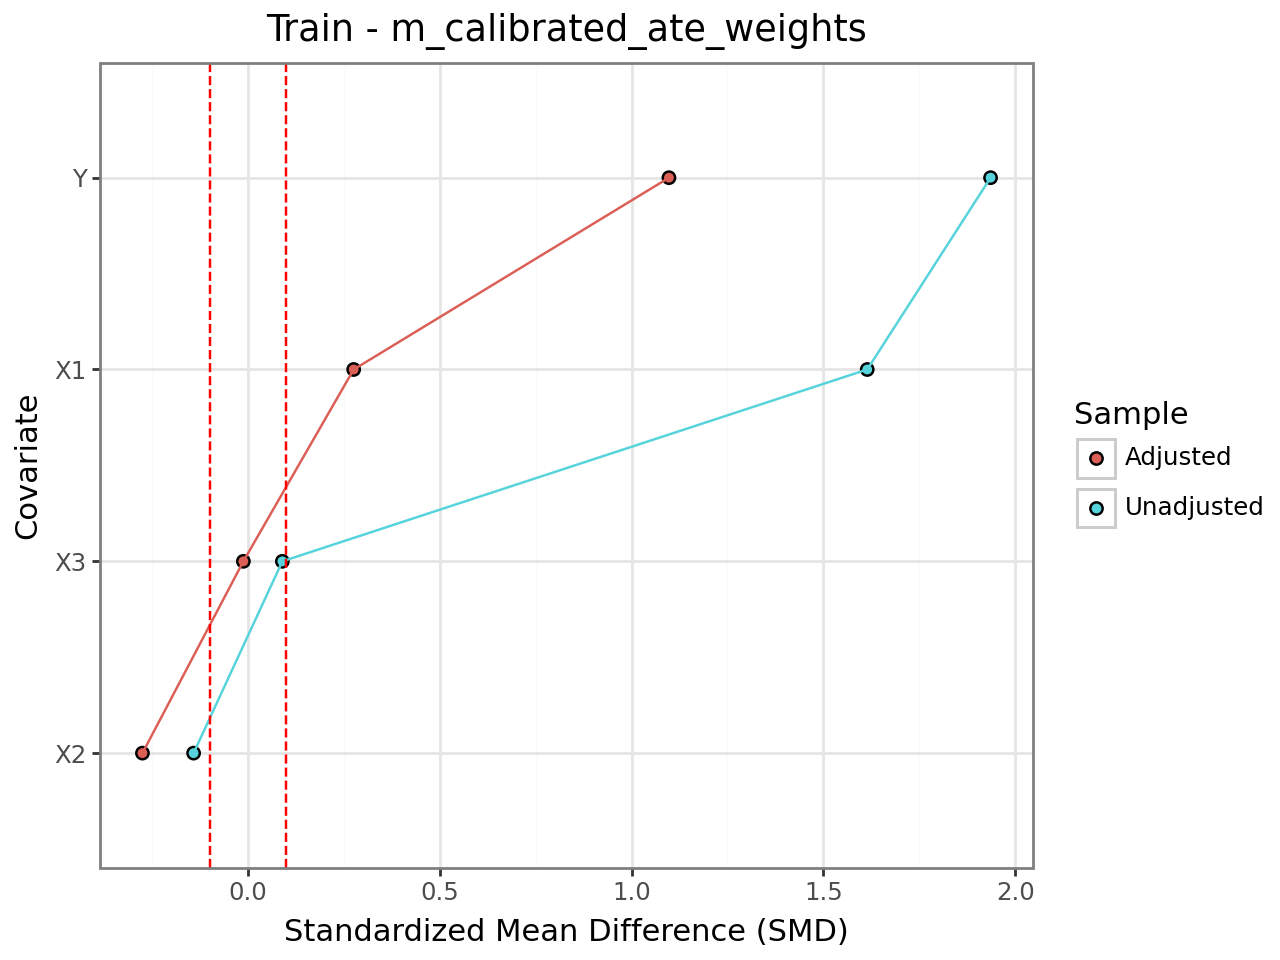

In [9]:
for i, p in enumerate(ate_plots_train):
    p.show()

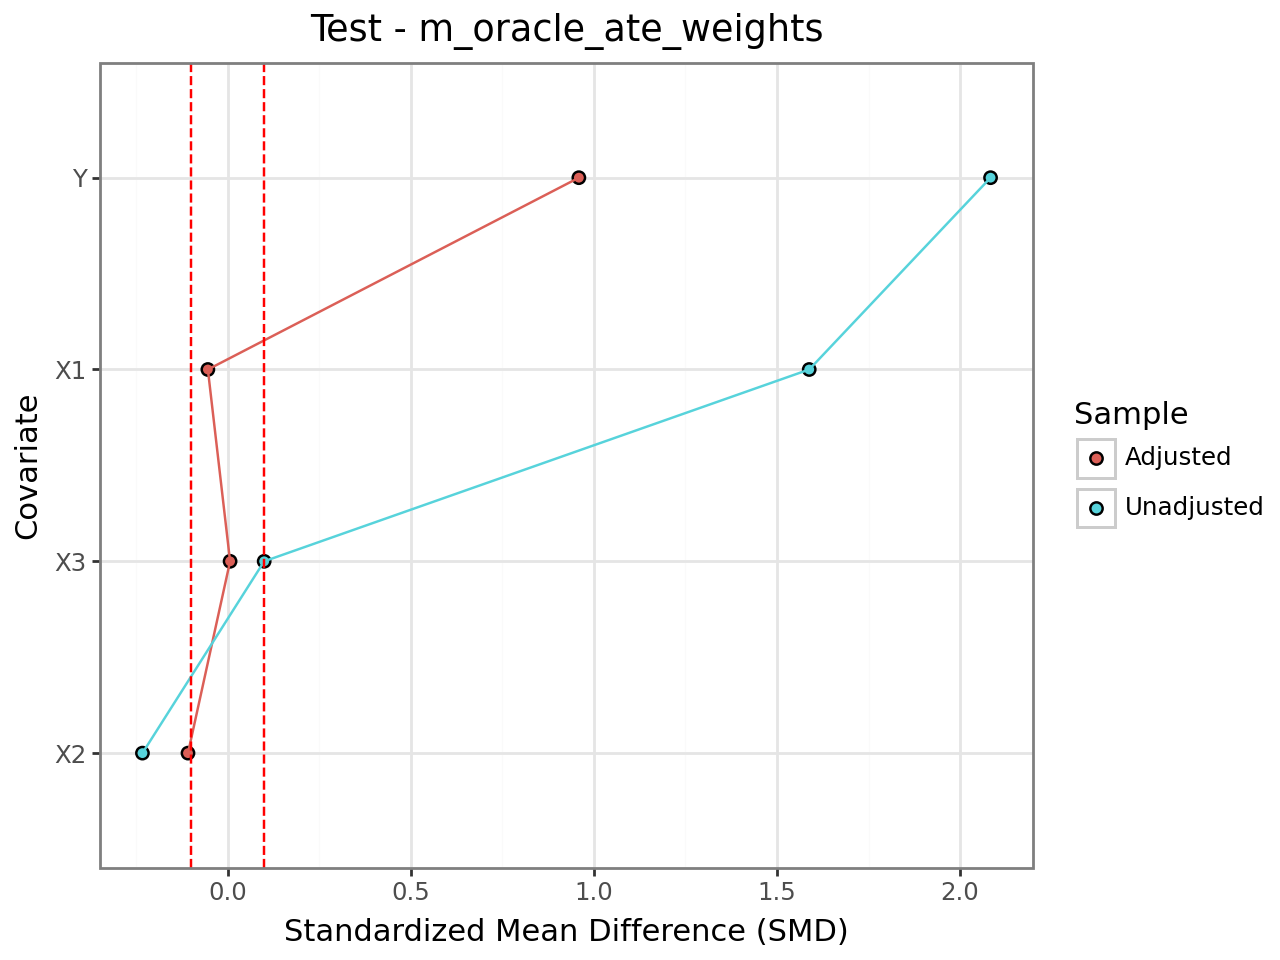

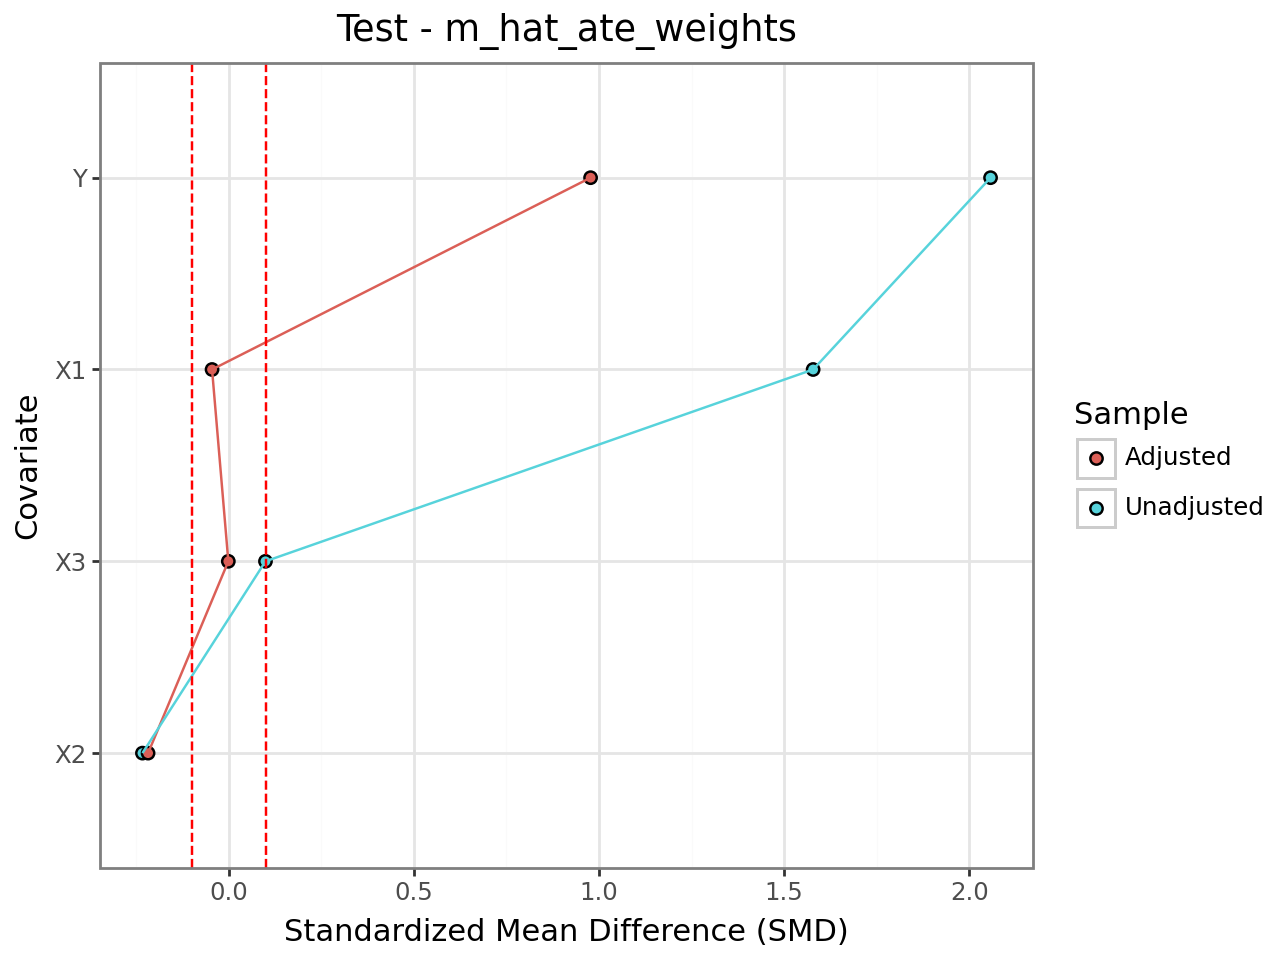

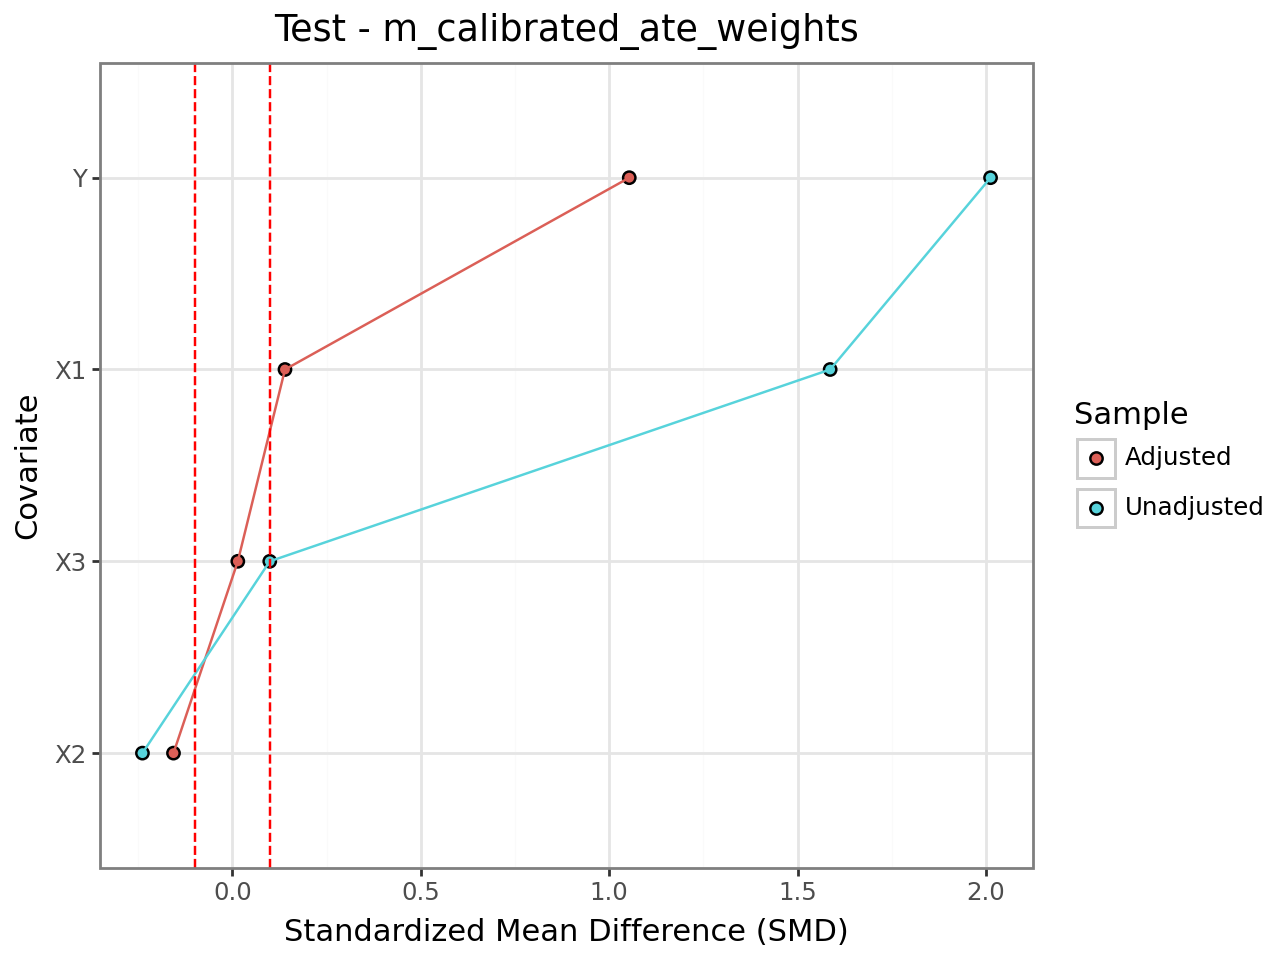

In [10]:
for i, p in enumerate(ate_plots_test):
    p.show()